This is a data science project that aims to find patients with coronary disease based on a machine learning classification algorithm. Our ultimate goal is to find the best classification algorithm for predicting heart disease, based on the F1 score. 

During this project, we will being performing exploratory data analysis, 

The dataset used is the heart disease uci public dataset, that can be found on the following link: https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci?datasetId=605543 . It is also available in the "data" folder of this repository.

#### Dataset Description

The dataset contains 5 continous variables, 4 boolean variables and 5 categorical variables. 

The variables are as follows: (var. name - var. description)



1.   Age - Age of the patient
2.   Sex - Gender of the patient. 0 for Male.
3.   cp - Chest pain level.
4.   trestbps - resting blood pressure
5.   chol -  cholesterol in mg/dl
6.   fbs - fasting blood sugar
7.   restecg - resting electrocardiogram results
8.   thalach - Maximum heart rate achieved
9.   exang - Exercise induced angina. 1 for yes.
10.   oldpeak - ST depression induced by exercise relative to rest
11.  slope -	The slope of the peak exercise ST segment
12.  ca - number of major vessels colored by fluorosopy
13.  thal - categorical variable: "3" is normal, "6" is fixed defect and "7" is reversible defect.
14.  Target - Target Column. 1 for "Has heart disease".


#### Importing modules

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA

import plotly.express as px

#### Uploading and reading the data

In [3]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Data preparation & exploration

In [8]:
# Correcting datatypes 
list1=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[list1] = df[list1].astype(object)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [10]:
# Discovering the correlations between numerical variables
df.corr()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [11]:
list2 = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

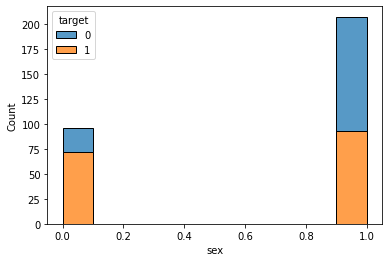

In [ ]:
sns.histplot(df, x='sex', hue='target', multiple='stack')
plt.show()

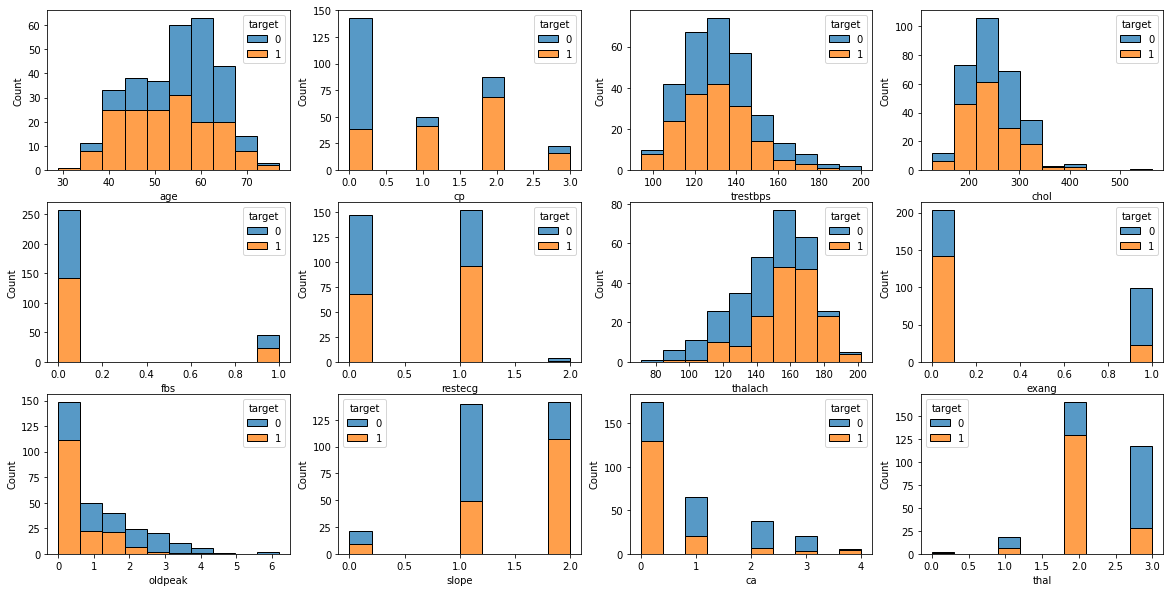

In [16]:
nrows = 3
ncols = 4
counter = 0

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]
    sns.histplot(data=df, x=df[list2[counter]], bins=10, hue=df['target'], ax=axes[i][j], multiple='stack')
    ax.set_xlabel(list2[counter])
    #ax.set_ylabel("Frequency")
    
    counter +=1

From the graphs above we can have a few insights about the data:


1.   Item da lista
2.   Item da lista



In [14]:
df2 = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

In [15]:
df2.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,1,0,0,0,0,0,0,1,0


In [20]:
# Diving the dataset into train, test and validation ( 0.6, 0.2 , 0.2)

X = df2.drop(['target'], axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11)

X_train = pd.DataFrame(X_train, columns=X_train.columns)
y_train = pd.Series(y_train)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=11)

#### PCA 2d Analysis

In [30]:
# We will make a PCA Analysis in 2d and plot a scatter graph to check
# if we're able to properly separate the patients.

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df2['target'])
fig.show()

#### Modeling

In [34]:
# Defining the models we're going to work with.

models = {
    'DecisionTree': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(),
    'LogRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier()}

In [35]:
for name, model in models.items():
  model.fit(X_train, y_train)
  yPred = model.predict(X_val)
  f1 = f1_score(y_val, yPred)
  acc = accuracy_score(y_val, yPred)
  recall = recall_score(y_val, yPred)
  roc = roc_auc_score(y_val, yPred)
  print(name)
  print('F1 Score: ', f1)
  print('Accuracy: ', acc)
  print('Recall: ', recall)
  print('ROC AUC: ', roc)
  print('-------------------')

DecisionTree
F1 Score:  0.8115942028985507
Accuracy:  0.7868852459016393
Recall:  0.8235294117647058
ROC AUC:  0.7821350762527233
-------------------
MLP Classifier
F1 Score:  0.8285714285714286
Accuracy:  0.8032786885245902
Recall:  0.8529411764705882
ROC AUC:  0.7968409586056645
-------------------
LogRegression
F1 Score:  0.8571428571428571
Accuracy:  0.8360655737704918
Recall:  0.8823529411764706
ROC AUC:  0.8300653594771241
-------------------
SGDClassifier
F1 Score:  0.7397260273972601
Accuracy:  0.6885245901639344
Recall:  0.7941176470588235
ROC AUC:  0.6748366013071896
-------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



As we can see, the Logistic Regression Classifier obtained the better results in the f1 score and overall. We shall use this model from now on. Proceeding to hyperparameter tunning:

In [ ]:
parameters = {
    "penalty": ['l1', 'l2', 'elasticnet'],
    "C": [1.0, 2.0, 0.5],
    "solver": ['newton-cg', 'lbfgs', 'liblinear']
}


LRegGrid = GridSearchCV(LogisticRegression(),parameters,scoring='f1', verbose=True)
LRegGridModel = LRegGrid.fit(X_val, y_val)

In [37]:
LRegGridModel.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [38]:
lreg_model = LogisticRegression(solver='liblinear')
lreg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [40]:
predict_Lreg = lreg_model.predict(X_test)

f1 = round(f1_score(y_test, predict_Lreg, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, predict_Lreg)*100, 2)
recall = round(recall_score(y_test, predict_Lreg)*100, 2)
roc = round(roc_auc_score(y_test, predict_Lreg)*100, 2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Recall Score: {recall}%")
print(f'ROC AUC: {roc}%')

F1 Score: 81.24%
Accuracy Score: 81.97%
Recall Score: 83.78%
ROC AUC: 81.48%


Conclusion: In our final result, we obtained a machine learning model that uses logistic regression to predict heart disease on patients. Our model obtained an F1 score of 81.24% when testing with previously unknown data.